## Grupo Bimbo Inventory Demand
Machine Learning using Logistic Regression

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [16]:
df=pd.read_csv('ags_data.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264976 entries, 0 to 1264975
Data columns (total 21 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1264976 non-null  int64  
 1   Semana                                       1264976 non-null  int64  
 2   Agencia_ID                                   1264976 non-null  int64  
 3   Canal_ID                                     1264976 non-null  int64  
 4   Ruta_SAK                                     1264976 non-null  int64  
 5   Cliente_ID                                   1264976 non-null  int64  
 6   Producto_ID                                  1264976 non-null  int64  
 7   Venta_uni_hoy                                1264976 non-null  int64  
 8   Venta_hoy                                    1264976 non-null  float64
 9   Dev_uni_proxima                              1

In [18]:
df.isnull().sum()

Unnamed: 0                                          0
Semana                                              0
Agencia_ID                                          0
Canal_ID                                            0
Ruta_SAK                                            0
Cliente_ID                                          0
Producto_ID                                         0
Venta_uni_hoy                                       0
Venta_hoy                                           0
Dev_uni_proxima                                     0
Dev_proxima                                         0
Demanda_uni_equil                                   0
NombreProducto                                      0
NombreProductoCat                                   0
Category                                            0
Town                                                0
Sum_Demanda_Semana_Producto_Agencia                 0
Diff1_DemandaUni_Producto_Agencia              204980
Diff2_DemandaUni_Producto_Ag

In [19]:
df['Diff1_DemandaUni_Producto_Agencia'].fillna(0, inplace=True)
df['Diff2_DemandaUni_Producto_Agencia'].fillna(0, inplace=True)
df['Diff1_DemandaUni_Producto_Agencia_Cliente'].fillna(0, inplace=True)
df['Diff1_DemandaUni_Producto_Agencia_Cliente.1'].fillna(0, inplace=True)

In [20]:
df.isnull().sum()   

Unnamed: 0                                     0
Semana                                         0
Agencia_ID                                     0
Canal_ID                                       0
Ruta_SAK                                       0
Cliente_ID                                     0
Producto_ID                                    0
Venta_uni_hoy                                  0
Venta_hoy                                      0
Dev_uni_proxima                                0
Dev_proxima                                    0
Demanda_uni_equil                              0
NombreProducto                                 0
NombreProductoCat                              0
Category                                       0
Town                                           0
Sum_Demanda_Semana_Producto_Agencia            0
Diff1_DemandaUni_Producto_Agencia              0
Diff2_DemandaUni_Producto_Agencia              0
Diff1_DemandaUni_Producto_Agencia_Cliente      0
Diff1_DemandaUni_Pro

In [22]:
df.columns

Index(['Unnamed: 0', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK',
       'Cliente_ID', 'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy',
       'Dev_uni_proxima', 'Dev_proxima', 'Demanda_uni_equil', 'NombreProducto',
       'NombreProductoCat', 'Category', 'Town',
       'Sum_Demanda_Semana_Producto_Agencia',
       'Diff1_DemandaUni_Producto_Agencia',
       'Diff2_DemandaUni_Producto_Agencia',
       'Diff1_DemandaUni_Producto_Agencia_Cliente',
       'Diff1_DemandaUni_Producto_Agencia_Cliente.1'],
      dtype='object')

In [28]:
# Assuming 'df' is your DataFrame containing the relevant data
# Selecting independent variables
X = df[['Agencia_ID','Cliente_ID','Venta_uni_hoy', 'Venta_hoy','Dev_uni_proxima', 'Dev_proxima', 'Category','Sum_Demanda_Semana_Producto_Agencia','Diff1_DemandaUni_Producto_Agencia',
       'Diff2_DemandaUni_Producto_Agencia',
       'Diff1_DemandaUni_Producto_Agencia_Cliente',
       'Diff1_DemandaUni_Producto_Agencia_Cliente.1']]

# Selecting the dependent variable
y = df['Demanda_uni_equil']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model
model1 = LogisticRegression(max_iter=100000)
model1.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model1.predict(X_test_scaled)

In [31]:

# Print the coefficients and intercept
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

Coefficients: [[-3.75457399e-01  1.02986612e-01 -2.82106688e+02 ... -1.57246221e-02
   4.88379040e-02  4.88379040e-02]
 [-3.76311500e-01  1.04213136e-01 -3.58432958e+02 ...  1.94485045e-01
  -8.61491682e-01 -8.61491682e-01]
 [-3.08366554e-01  9.11559786e-02 -2.56877375e+02 ...  1.36402878e-01
  -6.64388110e-01 -6.64388110e-01]
 ...
 [-9.00762579e-02 -9.83504571e-02  4.30007390e+00 ...  6.54074507e-02
  -1.50970516e-03 -1.50970516e-03]
 [-1.05598379e+00  3.28448105e-03  3.93986184e+00 ...  4.71978605e-02
   3.93002847e-01  3.93002847e-01]
 [-5.68841800e-01  1.60358392e-01  3.50780822e+00 ... -1.58051415e-02
   3.19926973e-01  3.19926973e-01]]
Intercept: [-2.22580937e+01 -1.51267532e+01  1.59938808e+01  3.44800219e+01
  4.39691387e+01  4.84094003e+01  5.02593845e+01  4.99277518e+01
  5.01511716e+01  4.90043344e+01  4.89362762e+01  4.66788120e+01
  4.61778049e+01  4.44788644e+01  4.35800298e+01  4.33849479e+01
  4.16745072e+01  4.01484044e+01  3.96790020e+01  3.80686765e+01
  3.87159807e+

In [32]:

def rmsle(predictions, targets):
    """
    Calculate Root Mean Square Logarithmic Error between two arrays.
    
    Parameters:
    - predictions: array containing predicted values
    - targets: array containing true values
    
    Returns:
    - rmsle: Root Mean Square Logarithmic Error
    """
    assert len(predictions) == len(targets), "Input arrays must have the same length"
    
    # Avoid log(0) by adding 1 to both predictions and targets
    log_diff = np.log1p(predictions) - np.log1p(targets)
    squared_log_diff = np.square(log_diff)
    mean_squared_log_diff = np.mean(squared_log_diff)
    rmsle = np.sqrt(mean_squared_log_diff)
    
    return rmsle

rmsle_value = rmsle(y_pred, y_test)
print("RMSLE:", rmsle_value)


RMSLE: 0.06755367415529438


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 52.419366314091924
Root Mean Squared Error: 7.240121981989801


In [34]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.5111622318139417


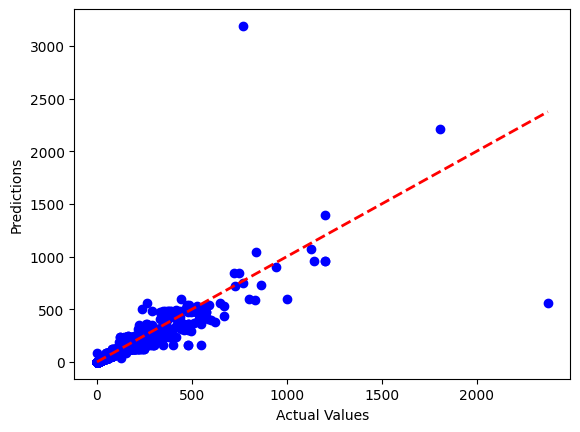

In [36]:
#Plotting the results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.show()